# 1. Data import

## Load dataset

In [1]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

# Importing the sklearn modules to be used
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

# We will import the ML classification algorithms when required in this notebook.

# Load in the data
df = pd.read_csv('updated_flights.csv')
df.head()





C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Passenger_ID,Flight_ID,Airline,Origin,Destination,Flight_Status,Age,Gender,Income_Level,Travel_Purpose,...,Seat_Selected,Distance_km,FlightDurationMinutes,DepartureDate,IsHoliday,Departure_Hour,Departure_Weekday,Departure_Month,Price,BaggageAllowance
0,P1,F68,Korean Air,NRT,ICN,On-time,47,Male,Medium,Emergency,...,Window,1256,94,2024-03-27,0,6,2,3,222.63,40
1,P2,F1687,Korean Air,NRT,TPE,On-time,30,Female,Low,Family,...,Middle,2181,163,2024-12-28,1,9,5,12,342.86,20
2,P4,F1514,Qantas,KUL,HKG,On-time,75,Female,Medium,Leisure,...,Window,2543,190,2023-10-31,0,8,1,10,789.64,0
3,P5,F1753,Korean Air,SIN,PVG,On-time,23,Male,High,Family,...,Middle,3805,285,2025-01-17,0,22,4,1,486.21,40
4,P6,F1928,Qantas,ICN,PVG,On-time,28,Female,Low,Emergency,...,Window,822,61,2025-02-15,1,1,5,2,603.79,0


# 2. Data Understanding

## Check if null 

In [2]:
# Understanding data in different ways

print("Dimension of the data:", df.shape)

print("\n", "--" * 50, "\n")

print("Summary of the data\n")
display(df.info())

print("\n", "--" * 50, "\n")

print("Missing values in the entire dataframe\n")
display(df.isnull().sum().sum())

print("\n", "--" * 50, "\n")

print("Statistical description:")
display(df.describe())

Dimension of the data: (8780, 28)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8780 entries, 0 to 8779
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Passenger_ID               8780 non-null   object 
 1   Flight_ID                  8780 non-null   object 
 2   Airline                    8780 non-null   object 
 3   Origin                     8780 non-null   object 
 4   Destination                8780 non-null   object 
 5   Flight_Status              8780 non-null   object 
 6   Age                        8780 non-null   int64  
 7   Gender                     8780 non-null   object 
 8   Income_Level               8780 non-null   object 
 9   Travel_Purpose             8780 non-null   object 
 10  Seat_Class                 8780 non-null   object 
 11  

None


 ---------------------------------------------------------------------------------------------------- 

Missing values in the entire dataframe



4331


 ---------------------------------------------------------------------------------------------------- 

Statistical description:


,Age,Flight_Satisfaction_Score,Delay_Minutes,Booking_Days_In_Advance,No_Show,Weather_Impact,Distance_km,FlightDurationMinutes,IsHoliday,Departure_Hour,Departure_Weekday,Departure_Month,Price,BaggageAllowance
count,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000
mean,48.643736,6.970524,9.948178,59.874829,0.051139,0.150569,2145.797039,160.479841,0.400911,11.442711,3.041913,6.539066,523.615114,19.845103
std,18.027095,1.482436,9.866494,34.636306,0.220294,0.357649,1462.415945,109.602310,0.490111,6.913672,1.992656,3.455634,150.519807,19.874849
min,18.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-60.930000,0.000000
25%,33.000000,6.000000,3.000000,30.000000,0.000000,0.000000,1220.000000,91.000000,0.000000,5.000000,1.000000,4.000000,423.775000,0.000000
50%,49.000000,7.000000,7.000000,60.000000,0.000000,0.000000,1689.000000,126.000000,0.000000,11.000000,3.000000,7.000000,524.855000,20.000000
75%,64.000000,8.000000,14.000000,90.000000,0.000000,0.000000,2962.000000,222.000000,1.000000,17.000000,5.000000,10.000000,623.080000,40.000000
max,79.000000,10.000000,87.000000,119.000000,1.000000,1.000000,6293.000000,472.000000,1.000000,23.000000,6.000000,12.000000,1245.660000,120.000000


## Fill null with 'Normal'

In [3]:
# 'MembershipTier' contains 'Normal', 'Silver', 'Gold' and 'Platinum'
df['MembershipTier'].fillna('Normal', inplace=True)

# Understanding data in different ways

print("Dimension of the data:", df.shape)

print("\n", "--" * 50, "\n")

print("Summary of the data\n")
display(df.info())

print("\n", "--" * 50, "\n")

print("Missing values in the entire dataframe\n")
display(df.isnull().sum().sum())

print("\n", "--" * 50, "\n")

print("Statistical description:")
display(df.describe())

Dimension of the data: (8780, 28)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8780 entries, 0 to 8779
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Passenger_ID               8780 non-null   object 
 1   Flight_ID                  8780 non-null   object 
 2   Airline                    8780 non-null   object 
 3   Origin                     8780 non-null   object 
 4   Destination                8780 non-null   object 
 5   Flight_Status              8780 non-null   object 
 6   Age                        8780 non-null   int64  
 7   Gender                     8780 non-null   object 
 8   Income_Level               8780 non-null   object 
 9   Travel_Purpose             8780 non-null   object 
 10  Seat_Class                 8780 non-null   object 
 11  

None


 ---------------------------------------------------------------------------------------------------- 

Missing values in the entire dataframe



0


 ---------------------------------------------------------------------------------------------------- 

Statistical description:


,Age,Flight_Satisfaction_Score,Delay_Minutes,Booking_Days_In_Advance,No_Show,Weather_Impact,Distance_km,FlightDurationMinutes,IsHoliday,Departure_Hour,Departure_Weekday,Departure_Month,Price,BaggageAllowance
count,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000,8780.000000
mean,48.643736,6.970524,9.948178,59.874829,0.051139,0.150569,2145.797039,160.479841,0.400911,11.442711,3.041913,6.539066,523.615114,19.845103
std,18.027095,1.482436,9.866494,34.636306,0.220294,0.357649,1462.415945,109.602310,0.490111,6.913672,1.992656,3.455634,150.519807,19.874849
min,18.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-60.930000,0.000000
25%,33.000000,6.000000,3.000000,30.000000,0.000000,0.000000,1220.000000,91.000000,0.000000,5.000000,1.000000,4.000000,423.775000,0.000000
50%,49.000000,7.000000,7.000000,60.000000,0.000000,0.000000,1689.000000,126.000000,0.000000,11.000000,3.000000,7.000000,524.855000,20.000000
75%,64.000000,8.000000,14.000000,90.000000,0.000000,0.000000,2962.000000,222.000000,1.000000,17.000000,5.000000,10.000000,623.080000,40.000000
max,79.000000,10.000000,87.000000,119.000000,1.000000,1.000000,6293.000000,472.000000,1.000000,23.000000,6.000000,12.000000,1245.660000,120.000000


#### Exploring the target variable - `no-show`

No_Show
0    8331
1     449
Name: count, dtype: int64

<Axes: xlabel='No_Show', ylabel='count'>

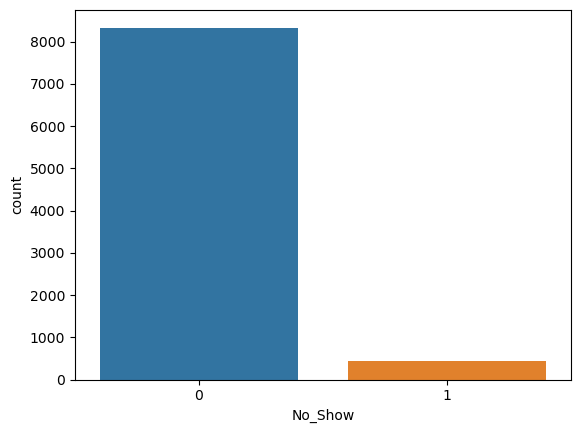

In [4]:
display(df['No_Show'].value_counts())
sns.countplot(x = df["No_Show"], data = df)

#### Observations from basic exploration:
1. There are total 8780 records/rows and 25 columns in the dataset.
2. 3 independent variables have `float` values, 8 independent variables have `integer` values and 13 independent variables have `object` categorical values.
3. The `No_Show` column which is the target, has categorical/text data.
4. There is no missing value in any row/column. Hence, no need to treat the missing values.
5. There are 2 unique varieties of the No_Show outcome having a count of 8331 and 449 each in the dataset. This means we have total **2** classes to classify the new inputs in.

### Correlation analysis

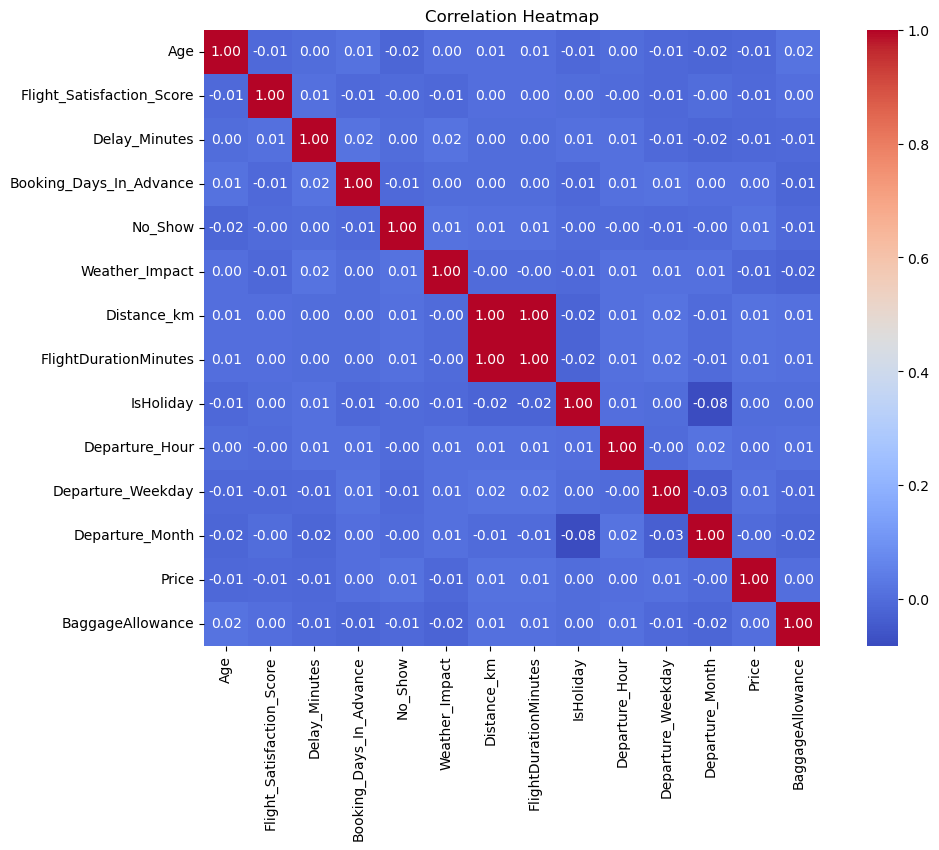

No_Show                      1.000000
Weather_Impact               0.013582
Price                        0.013210
FlightDurationMinutes        0.008825
Distance_km                  0.008805
Delay_Minutes                0.000643
Departure_Month             -0.001502
Flight_Satisfaction_Score   -0.002185
Departure_Hour              -0.002601
IsHoliday                   -0.003175
Departure_Weekday           -0.005662
BaggageAllowance            -0.005996
Booking_Days_In_Advance     -0.009074
Age                         -0.016408
Name: No_Show, dtype: float64


In [5]:
# Compute correlation on numeric columns
corr_matrix = df.select_dtypes(include='number').corr()

# Plot the correlation matrix as a heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Sort by correlation with No_Show
no_show_corr = corr_matrix['No_Show'].sort_values(ascending=False)
print(no_show_corr)

<font color = "red"> **NOTE:** The last column contains categorical values and hence, it doesn't appear in the coorelation matrix. The coorelation matrix can help us understand how inter-correlation are the independent variables with each other.

    
#### Observation from correlation analysis:

- None of the numeric features strongly correlate with No_Show.

- This is common in real-world classification problems where categorical or interaction features (like airline, seat class, flight status, frequent flyer status, etc.) are more predictive than raw numerical ones.

We will use all the features for training the algorithm and check the accuracy.

# 3. Data Preparation

## <font color = "blue">3.1 Data Cleaning

### Filter out Multicollinearity rows with strong correlation
Multicollinearity (e.g., Distance_km and FlightDurationMinutes = 0.999997 → redundant)

In [6]:
df = df.drop('FlightDurationMinutes', axis=1)

### Filter out any rows with negative key metrics
Builds a Boolean mask that’s True only for rows where all three columns are ≥ 0.

Assigning back to df drops every row where any of those conditions fails (i.e., negative duration, negative distance, or negative price).

The result is that your DataFrame now contains only flights with non‑negative duration, distance, and price—cleaning out obviously invalid records.

In [7]:
df = df[(df['Distance_km'] >= 0) &
        (df['Price'] >= 0)]

df.shape

(8777, 27)

## <font color = "blue">3.2 Feature Selection

We have a lot of features/columns in our data. We will selection only those columns which are to be used in the analysis or data modelling. This method is called feature selection.

In [8]:
# Selecting the predictors and target
X = df.drop(['No_Show','Passenger_ID', 
             'Flight_ID', 'Income_Level', 
            'Flight_Satisfaction_Score', 'DepartureDate',
            'Seat_Selected'], axis = 1)  # taking all columns as input except IDs and 'No_Show' column
Y = df['No_Show']   # taking only No_Show column as the target

# Verifying the features and target variables
display(X.head())
display(Y.head())

,Airline,Origin,Destination,Flight_Status,Age,Gender,Travel_Purpose,Seat_Class,MembershipTier,Check_in_Method,Delay_Minutes,Booking_Days_In_Advance,Weather_Impact,Distance_km,IsHoliday,Departure_Hour,Departure_Weekday,Departure_Month,Price,BaggageAllowance
0,Korean Air,NRT,ICN,On-time,47,Male,Emergency,Business,Platinum,Online,0.0,91,1,1256,0,6,2,3,222.63,40
1,Korean Air,NRT,TPE,On-time,30,Female,Family,Business,Gold,Airport Kiosk,2.0,45,0,2181,1,9,5,12,342.86,20
2,Qantas,KUL,HKG,On-time,75,Female,Leisure,Business,Platinum,Online,9.0,57,1,2543,0,8,1,10,789.64,0
3,Korean Air,SIN,PVG,On-time,23,Male,Family,Economy,Silver,Desk,3.0,58,0,3805,0,22,4,1,486.21,40
4,Qantas,ICN,PVG,On-time,28,Female,Emergency,Business,Normal,Online,11.0,68,0,822,1,1,5,2,603.79,0


0    1
1    0
2    0
3    0
4    0
Name: No_Show, dtype: int64

## <font color = "blue">3.3 Feature Engineering 🔧
👉 The FE method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**. It also use StandardScaler to scale all numeric columns

Numeric: ['Age', 'Delay_Minutes', 'Booking_Days_In_Advance', 'Weather_Impact', 'Distance_km', 'IsHoliday', 'Departure_Hour', 'Departure_Weekday', 'Departure_Month', 'Price', 'BaggageAllowance']
Index(['Airline', 'Origin', 'Destination', 'Flight_Status', 'Gender',
       'Travel_Purpose', 'Seat_Class', 'MembershipTier', 'Check_in_Method'],
      dtype='object')


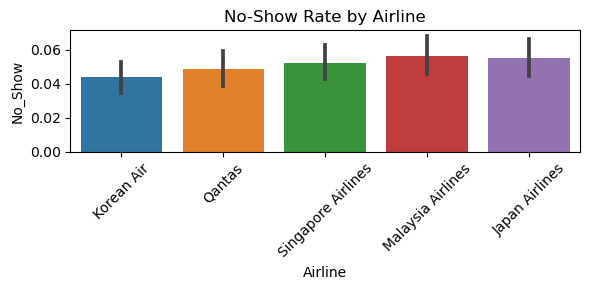

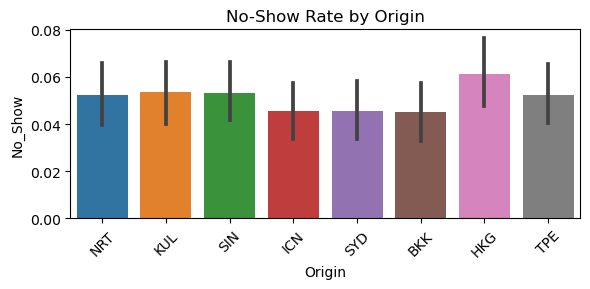

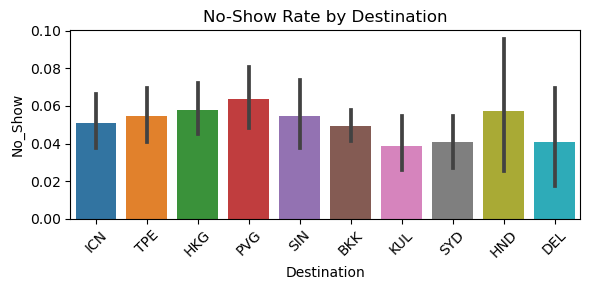

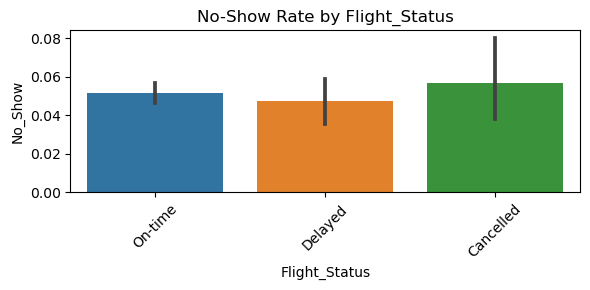

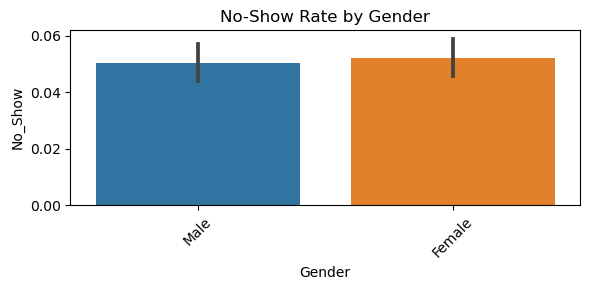

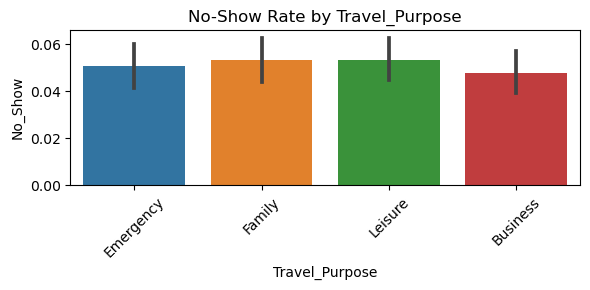

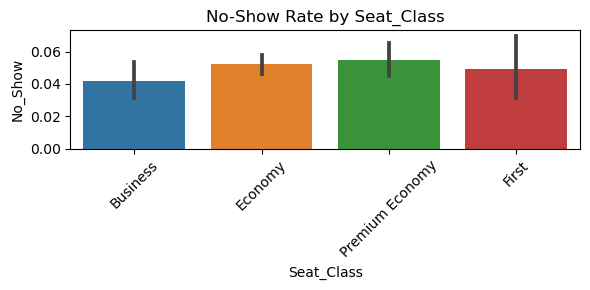

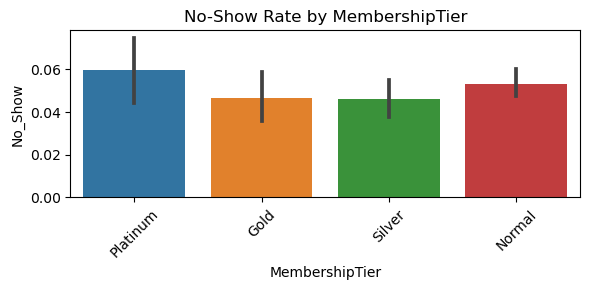

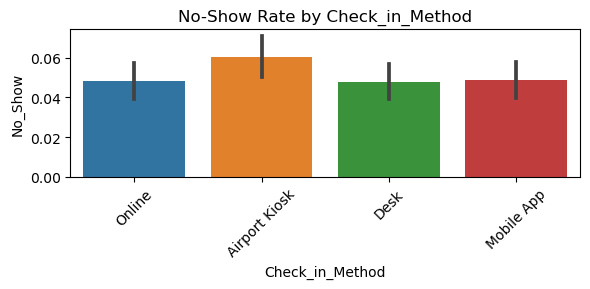

In [9]:
# Importing the function/module to randomly split the data

from sklearn.model_selection import train_test_split 

# Split the data into train and test
 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)


numeric_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numeric:", numeric_features)

categorical_features = X.select_dtypes(include='object').columns
print(categorical_features)

# assess their impact on No_Show
for col in categorical_features:
    plt.figure(figsize=(6, 3))
    sns.barplot(data=df, x=col, y='No_Show', estimator=lambda x: sum(x)/len(x))
    plt.xticks(rotation=45)
    plt.title(f'No-Show Rate by {col}')
    plt.tight_layout()
    plt.show()

### Build a ColumnTransformer that:
StandardScales all numeric columns
OneHotEncodes all categorical columns (dropping the first level)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [11]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(
                drop='first',
                handle_unknown='ignore',
                sparse=False
           ), categorical_features)
])

## <font color = "blue">3.4 Splitting the data to train and test sets

In [12]:
# Importing the function/module to randomly split the data

from sklearn.model_selection import train_test_split 

# Split the data into train and test
 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# in this our main data is split into train and test
# the attribute test_size=0.2 splits the data into 80% and 20% ratio. train=80% and test=20%
# We have set the reproduceability using random_state

print("Train Shape",X_train.shape)
X_train.head()
print("Test Shape",X_test.shape)
X_test.head()

Train Shape (7021, 20)
Test Shape (1756, 20)


,Airline,Origin,Destination,Flight_Status,Age,Gender,Travel_Purpose,Seat_Class,MembershipTier,Check_in_Method,Delay_Minutes,Booking_Days_In_Advance,Weather_Impact,Distance_km,IsHoliday,Departure_Hour,Departure_Weekday,Departure_Month,Price,BaggageAllowance
234,Japan Airlines,HKG,BKK,Cancelled,21,Male,Family,Premium Economy,Normal,Airport Kiosk,4.0,75,0,1689,0,16,1,9,461.13,0
1022,Malaysia Airlines,SIN,BKK,On-time,43,Female,Emergency,Business,Silver,Desk,1.0,42,0,1416,0,18,4,2,485.54,0
3477,Korean Air,SIN,HKG,Delayed,55,Male,Family,Economy,Silver,Mobile App,19.0,84,0,2565,0,11,0,11,507.87,20
8586,Singapore Airlines,NRT,BKK,Delayed,75,Male,Emergency,Economy,Normal,Desk,10.0,109,0,4648,1,11,6,8,216.46,20
5663,Malaysia Airlines,KUL,BKK,On-time,40,Male,Leisure,First,Silver,Mobile App,9.0,51,0,1220,0,1,2,11,616.32,20


# 4. Data modelling

We tried multiple classification algorithms to classify the target variable (`No_Show`) based on all independent variables. 

Then, we compared the accuracy from all those model to decide which one performs best. 

The best performing model **Random Forest Classifier** selected to classify flight passenger no show probability.

## <font color = "blue">Random Forest Classifier

In [13]:
# import the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import pickle

In [14]:
# Create a pipeline that first transforms, then fits a RandomForest
pipeline = ImbPipeline([
    ('pre', preprocessor),
    # SMOTE Technique to avoid overfitting
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Train it
pipeline.fit(X_train, Y_train)

# Evaluate on the test set
rfPrediction = pipeline.predict(X_test)
print("RF accuracy:", metrics.accuracy_score(Y_test, rfPrediction))

# Persist the entire pipeline (preprocessor + model) to disk
with open('rf_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

RF accuracy: 0.9515945330296127


# 5. Model Performance Evaluation

#### Confusion Matrix and Classification Report

[[1671    0]
 [  85    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1671
           1       0.00      0.00      0.00        85

    accuracy                           0.95      1756
   macro avg       0.48      0.50      0.49      1756
weighted avg       0.91      0.95      0.93      1756



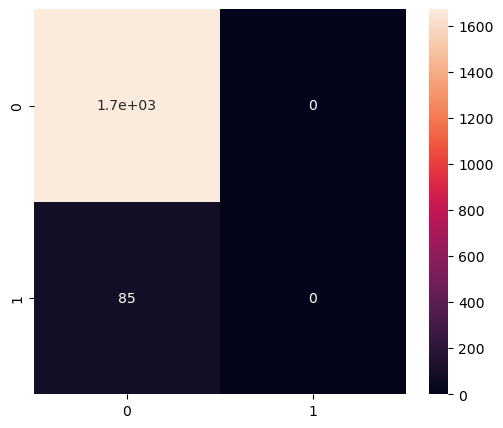

In [15]:
# rfprediction
logConf = metrics.confusion_matrix(Y_test, rfPrediction)
print(logConf)

plt.figure(figsize = (6,5))
sns.heatmap(logConf, annot = True);

print(metrics.classification_report(Y_test,rfPrediction))